#Web crwler 

Web architecture is based on a client-server model. When it comes to delivering internet-based content, this strong system relies on server autonomy. Documents are distributed and non-linear in a system known as Hypertext Documents. A document's hypertext can be defined as any piece of text or image that is linked to other documents using anchor tags in these systems. Retrieving and displaying hyperlinked materials is made simple with the use of HTTP and HTML. Search engines are used by browsers to look across servers for the pages of data they need. Server-side pages are processed by the client. 

Internet access to world wide web information has become an essential component of human life in the modern day. 

Using a web crawler, a user can browse the Internet in a methodical and automated manner. When a web page has a link to another page that may be clicked on, it is part of the WWW's visual structure. An internet search can be thought of as a process of exploring a directed graph made up of online pages and hyperlinks. It is possible for a web crawler to browse numerous new web pages from a single page by following the linked structure of the Internet. The graphical structure of web pages is used by a web crawler to travel from page to page. Robots, spiders, and worms are all examples of these programs. For the purpose of retrieving and archiving web pages, crawlers are used (Kausar, 2013).

A web crawler scrapy with useful features is used to gather all of the data extracted from various sources using scripts written in Python language. The data is then further analyzed according to the requirements and exported to CVS file. This methodology was used to complete this project. Web crawler beautifulsoup, which is a Python-based tool, also assist us in obtaining the needed results, as we analyze the process with specific code and provide the desired url for the iteration to conduct for scrapping the data from the source url, among other things.

Despite the fact that the major focus of the website was not new, it was determined that getting data from a specific set of defined classifications was important for this study. For the purpose of training the categorization rules, examples of webpages were gathered from each of the three classifications (positive, negative, neutral). 

An extensive manual search was conducted to build a list of web domains for each class. Three Austrian news outlets that was available for the public were chosen as the final source of data https://7news.com.au   https://thenewdaily.com.au/  and http://theage.com.au/ . Since some of these categories can be viewed as positive or bad, we decided to extract data based on topic category. Local news, for example, may include stories about natural disasters, political plotlines, and sports that are either positive or negative, and so on.
In order to request only HTML resources, we make our HTTP HEAD request to determine the MIME(Multipurpose Internet Mail Extensions) type of a Web resource before making a GET request to get the whole resource.

In accordance with the Robots exclusion standard, we examined each website's robots.txt file to discover whether it allowed or disallowed web crawlers, as indicated by the file User-agent: Using the wildcard * to indicate that all robots are allowed to visit all files, the Disallow directive has no effect, indicating that no pages are blocked. Because the wildcard * stands for all robots and the Disallow directive has no effect, no pages are disallowed ("Robots.txt File [2021 Examples] [Disallow]", n.d.). 

Australian copyright law sets out five situations where use of copyrighted material without permission may be allowed, Students can copy and communicate limited amounts of material under ‘fair dealing‘ without seeking the permission of the copyright owner. To rely on fair dealing, the use of the material must be fair and for the purpose of research or study ("Students and Copyright - Smartcopying", n.d.). The crawled data was used for study purpose, they were not edited.   


In [ ]:
import requests
import re
from bs4 import BeautifulSoup
import time
import pandas as pd
from urllib.parse import urljoin

With the help of Beautiful Soup, we can easily extract certain content from a webpage, remove HTML markup from it, and save the data into dataframe then exported in cvs file or excel sheet. It also Helps clean and parse documents we have retrieved. By using this tool, we will collect the following data; News Title, Article Content, URL , Category and news outlet name. 

We used Safari Inspect element feature to determine which HTML tag the requested data is stored in. However first we start by calling our list of websites, each news outlet url is sored in python list, both The Age and 7News url are in the same format (example: www.websitename.com.au/cateogry)  unlike thenewdaily they have category and subcategory. Looking at each tag of each website we notice the following: 



Website | URL Tag | Content Tag
--- | ---| ---
TheAge` |< h3 > | < article >
The newdaily |< article > | < p >
7News |< div > | < article >

---


Once the html page has been parsed and the url derived from the tag, the process is complete. TheNewDaily doesn't extract www from its url when we first start pulling the article content based on the tag. As a result of this, we introduced an additional condition to verify whether the website contains www. when extracting the category using split.
Our extracted content didn’t need any cleaning or remove extra <p> tag Beautiful Soup .text method


In [ ]:

def get_soup(url):
  user_agent = 'Mozilla/5.0'
  headers = {'User-Agent': user_agent }
  page = requests.get(url = url,headers=headers)
  soup = BeautifulSoup(page.content, 'html.parser')

  return soup

def get_urls(url,news_category):
    urls = []
    tag = "div"
    if "theage" in url:
      tag = "h3"
    if "thenewdaily" in url:
        tag = "article" 
    for h3 in get_soup(url).findAll(tag):
      for a in h3.findAll("a", href=True):
        if not a['href'].startswith("https:"):
          if a['href'].startswith(tuple(news_category)):
            urls.append(urljoin(url[:-1],"/")+a["href"][1:]) #get base url and remove extra backslash if any
        else: #the other website
          if a['href'].startswith("https://"+url.split(".")[1]):
            if any(x in a['href'] for x in news_category):
              urls.append(a["href"])
    return list(dict.fromkeys(urls))


def get_news(urls,news_category):
  article_cat = []
  news_outlet = []
  list_url = []
  list_content = []
  list_title = []
  list_content = []
  complete_article =[]
  complete_cat = []
  count= 0
  for url in urls:
    for i in get_urls(url,news_category):
      print(i)
      list_url.append(i)
      if not "www." in i:
        news_outlet.append(i.split(".")[0].split("/")[2])
        article_cat.append(i.split('/')[1:][3])
      else:
        news_outlet.append(i.split(".")[1])
        article_cat.append(i.split('/')[1:][2])
      list_title.append(get_soup(i).find("title").string)
      if not "thenewdaily" in i:
        for ii in get_soup(i).findAll('article'):
          count +=1 
          print(count)
          for j in ii.findAll('p'):
            list_content.append(j.text)
            time.sleep(2)
        complete_article.append(''.join(list_content))
        del list_content[:]
      else: #newdaily
        for j in get_soup(i).findAll('p'):
            list_content.append(j.text)
            time.sleep(2)
        complete_article.append(''.join(list_content))
        del list_content[:]
  
  df = pd.DataFrame({'Title': list_title,'Article': complete_article,'Category': article_cat,'URL': list_url,'News Outlet': news_outlet})
  



  return df 

In [ ]:
age_cat = ["/world/","/sport/","/technology/","/politics/"]
news7_cat= ["/sport/","/technology/","/politics/","/world/"]
thenewdaily_cat= ["politics","sport","tech","world"] #the world cat is under news cat 


news7_list_urls = ["https://www.7news.com.au/sport","https://www.7news.com.au/politics","https://www.7news.com.au/news/world","https://www.7news.com.au/technology"]
theAge_list_urls = ["https://www.theage.com.au/politics","https://www.theage.com.au/sport","https://www.theage.com.au/world","https://www.theage.com.au/technology"]
thenewdaily_url_list = ["https://www.thenewdaily.com.au/life/tech","https://www.thenewdaily.com.au/news/world","https://www.thenewdaily.com.au/sport","https://www.thenewdaily.com.au/news/politics"]



In [ ]:
df_news7 = get_news(news7_list_urls,news7_cat)
df_news7.to_csv('df_news7.csv') 
df_news7.to_excel('df_news7.xlsx') 
df_theAge = get_news(theAge_list_urls,age_cat)
df_theAge.to_csv('df_theAge.csv') 
df_theAge.to_excel('df_theAge.xlsx') 
df_newDaily = get_news(thenewdaily_url_list,thenewdaily_cat)
df_newDaily.to_csv('df_newDaily.csv') 
df_newDaily.to_excel('df_newDaily.xlsx') 

Display below is our raw corpus for 7NEWS



In [ ]:
df_news7

From the figures below we can see the total number of retrived articles based on news outlet and category with total number of 275 dataset




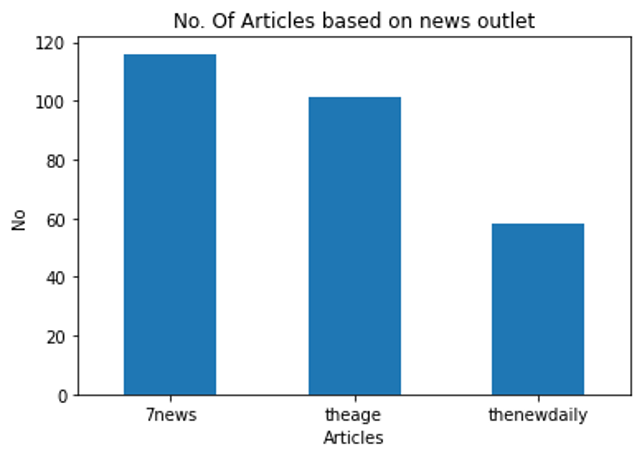![image.png]()



  

 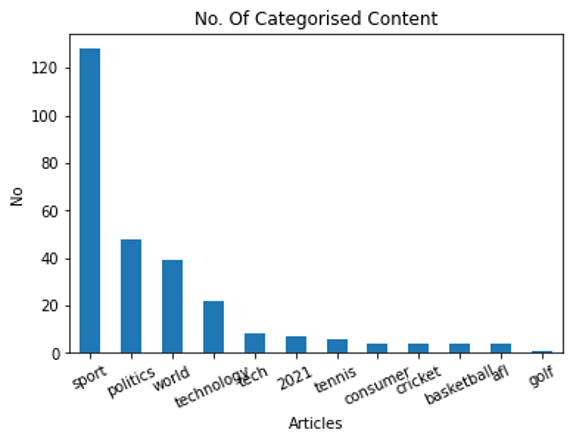

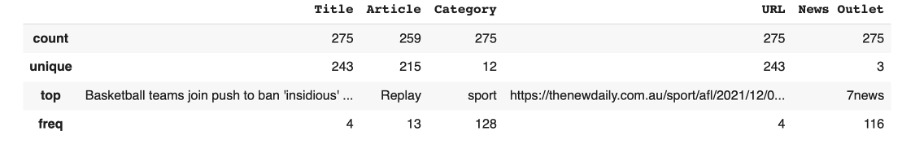